In [195]:
feature_lists = ['eEta', 'mEta', 'e_met_mT', 'm_met_mT', 'e_m_Mass', 'mpt', 'ept', 'met', 'DeltaPhi_e_m', 'DeltaPhi_e_met', 'DeltaPhi_m_met', 'njets'] 

In [196]:
features_map = {
    "mva": ['BDT Discriminator', 50, 0, 1],
    "njets": ['No. of Jets', 10, 0, 10],
    "e_m_Mass": ['$m_{e\mu}$ [GeV]', 110, 0, 200],
    "met": ['$E^{miss}_{T}$ [GeV]', 30, 0, 200],
    "eEta": ['$\eta^{e}$', 30, -2.5, 2.5],
    "mEta": ['$\eta^{\mu}$', 30, -2.5, 2.5],
    "mpt": ['$p_{T}^{\mu}$', 30, 26, 200], 
    "ept": ['$p_{T}^{e}$', 30, 24, 200], 
    "mpt_Per_e_m_Mass": ['$p_{T}^{\mu}/m_{e\mu}$', 30, 0.15, 1], 
    "ept_Per_e_m_Mass": ['$p_{T}^{e}/m_{e\mu}$', 30, 0.15, 1], 
    "empt": ['$p_{T}^{e\mu}$ [GeV]', 30, 0, 150],
    "emEta": ['$\eta^{e\mu}$', 30, -6, 6], 
    "DeltaEta_e_m": ['$\Delta \eta[e, \mu]$', 30, 0, 3.5], 
    "DeltaPhi_e_met": ['$\Delta \phi[e, MET]$', 30, 0, 3.5], 
    "DeltaPhi_m_met": ['$\Delta \phi[\mu, MET]$', 30, 0, 3.5], 
    "DeltaPhi_e_m": ['$\Delta \phi[e, \mu]$', 30, 0, 3.2], 
    "DeltaR_e_m": ['$\Delta R[e, \mu]$', 30, 0, 4.5], 
    "e_met_mT": ['$m_{T}[e, MET]$', 30, 0, 250], 
    "m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "pZeta85": ['$p_{\zeta}$ [GeV]', 50, -150, 150], 
    "pZeta15": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZeta": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZetaVis": ['$p^{vis}_{\zeta}$ [GeV]', 550, -200, 350],
    "j1pt": ['$p_{T}^{j_{1}}$ [GeV]', 30, 30, 250], 
    "j1Eta": ['$\eta^{j_{1}}$', 30, -5, 5], 
    "DeltaEta_j1_em": ['$\Delta \eta[j_{1}, e\mu]$', 60, 0, 6], 
    "DeltaPhi_j1_em": ['$\Delta \phi[j_{1}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j1_em": ['$\Delta R[j_{1}, e\mu]$', 80, 0, 8],
    "j2pt": ['$p_{T}^{j_{2}}$ [GeV]', 30, 30, 100], 
    "j2Eta": ['$\eta^{j_{2}}$', 30, -5, 5], 
    "j1_j2_mass": ['$m_{j_{1}j_{2}}$ [GeV]', 30, 0, 450], 
    "DeltaEta_em_j1j2": ['$\Delta \eta[j_{1}j_{2}, e\mu]$', 60, 0, 6], 
    "DeltaPhi_em_j1j2": ['$\Delta \phi[j_{1}j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_em_j1j2": ['$\Delta R[j_{1}j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j2_em": ['$\Delta \eta[j_{2}, e\mu]$', 50, 0, 5], 
    "DeltaPhi_j2_em": ['$\Delta \phi[j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j2_em": ['$\Delta R[j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j1_j2": ['$\Delta \eta[j_{1}, j_{2}]$', 30, 0, 4.5], 
    "DeltaPhi_j1_j2": ['$\Delta \phi[j_{1}, j_{2}]$', 30, 0, 3.2], 
    "DeltaR_j1_j2": ['$\Delta R[j_{1}, j_{2}]$', 30, 0, 7], 
    "Zeppenfeld": ['$\eta^{e\mu}-(\eta^{j_{1}}+\eta^{j_{2}})/2$', 30, -5, 5], 
    "Zeppenfeld_DeltaEta": [r'Zeppenfeld variable', 30, -6, 6], 
    "absZeppenfeld_DeltaEta": ['', 100, -5, 5], 
    "cen": ['', 50, 0, 1.2], 
    "Rpt": ['$R_{p_{T}}$', 30, 0, 0.8], 
    "pt_cen": ['', 100, 0, 1], 
    "pt_cen_Deltapt": [r'$p_{T}$-centrality', 30, 0, 1.5], 
    "abspt_cen_Deltapt": ['', 100, 0, 1], 
    "Ht_had": ['$H_{T}$ [GeV]', 50, 0, 600], 
    "Ht": ['$H_{T}$ [GeV]', 50, 0, 600],  
}

In [198]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP','2016postVFP','2017','2018']
var_dict = {}

for year in years:
    print(f'Processing {year}')
    result = load(f"../results/{year}/makeDF_WW/output.coffea")
    if isinstance(result,tuple):
        result = result[0]
    for varName in result:
        if '0jets' in varName:
            if varName.replace('_0jets','') in var_dict:
                var_dict[varName.replace('_0jets','')] = np.append(var_dict[varName.replace('_0jets','')],result[varName].value)
            else:
                var_dict[varName.replace('_0jets','')] = result[varName].value
    for varName in result:
        for i in ['1jets', '2jets']:
            if varName.replace(f'_{i}','') in var_dict:
                var_dict[varName.replace(f'_{i}','')] = np.append(var_dict[varName.replace(f'_{i}','')],result[varName].value)

df = pd.DataFrame(var_dict)
df['ept'] = df["ept_Per_e_m_Mass"]*df["e_m_Mass"]
df['mpt'] = df["mpt_Per_e_m_Mass"]*df["e_m_Mass"]

Processing 2016preVFP
Processing 2016postVFP
Processing 2017
Processing 2018


In [199]:
data_cuts_os = df[ (df['opp_charge']==1) & (df['njets']==0) ]# & (df['DeltaPhi_m_met']>.5) & (df['DeltaPhi_e_met']>.5)]#& (df["DeltaPhi_e_m"]<2.6) & (df["met"]>50) & (df["DeltaPhi_m_met"]>.8) & (df["DeltaPhi_e_met"]>.8)]
data_cuts_ss = df[ (df['opp_charge']!=1) & (df['njets']==0) ]# & (df['DeltaPhi_m_met']>.5) & (df['DeltaPhi_e_met']>.5)]#& (df["DeltaPhi_e_m"]<3) & (df["met"]>10) & (df['e_met_mT']>25) & (df['m_met_mT']>25)]#& (df["DeltaPhi_e_m"]<2.6) & (df["met"]>50) & (df["DeltaPhi_m_met"]>.8) & (df["DeltaPhi_e_met"]>.8)]

In [202]:
samples = ['data', 'TTTo2L2Nu', 'ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5', 'DYJetsToLL_M-50', 'DYJetsToLL_M-10to50', 'WGToLNuG_TuneCP5', 'TTToSemiLeptonic', 'TTToHadronic', 'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 'ST_t-channel_antitop_4f_InclusiveDecays', 'ST_t-channel_top_4f_InclusiveDecays', 'EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets', 'GluGluHToTauTau', 'VBFHToTauTau', 'WminusHToTauTau', 'WplusHToTauTau', 'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau', 'WJetsToLNu_TuneCP5', 'W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu']

for i,j in enumerate(samples):
    print(j, data_cuts_os[data_cuts_os['sample']==i]['weight'].sum())

data 3725.0
TTTo2L2Nu 855.417701281716
ZZ_TuneCP5 3.5072569121764365
WZ_TuneCP5 54.99261927120468
WW_TuneCP5 1564.2791904305413
DYJetsToLL_M-50 196.7690104771265
DYJetsToLL_M-10to50 0.0
WGToLNuG_TuneCP5 44.88276958030767
TTToSemiLeptonic 2.865420981353653
TTToHadronic 0.0
ST_tW_antitop_5f_inclusiveDecays 166.83223840463756
ST_tW_top_5f_inclusiveDecays 170.3823470082429
ST_t-channel_antitop_4f_InclusiveDecays 3.475796028219462
ST_t-channel_top_4f_InclusiveDecays 4.469847658817331
EWKZ2Jets_ZToLL 0.6886011804303152
EWKZ2Jets_ZToNuNu 0.0
EWKWMinus2Jets 0.26887956518853223
EWKWPlus2Jets 1.635404716385067
GluGluHToTauTau 1.295027217566914
VBFHToTauTau 0.04160761855458556
WminusHToTauTau 0.198932547952675
WplusHToTauTau 0.27056296881427544
GluGluHToWWTo2L2Nu 16.339978264955647
VBFHToWWTo2L2Nu 0.3093561125294233
ZHToTauTau 0.09397155604003646
WJetsToLNu_TuneCP5 26.088719822608873
W1JetsToLNu 20.66192754598221
W2JetsToLNu 7.618634496377906
W3JetsToLNu 3.1781820671541245
W4JetsToLNu 0.0


In [203]:
print(data_cuts_os.loc[data_cuts_os['sample']==0,'weight'].sum(), data_cuts_os.loc[data_cuts_os['sample']!=0,'weight'].sum())

3725.0 3146.5639837148847


In [93]:
reweight = data_cuts_os.loc[data_cuts_os['sample']==0,'weight'].sum() / data_cuts_os.loc[data_cuts_os['sample']!=0,'weight'].sum()
data_cuts_os.loc[data_cuts_os['sample']==samples.index('TTTo2L2Nu'),'weight'] *= reweight

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [200]:
dict_of_hists = {}

from coffea import hist

dataset_axis = hist.Cat("dataset", "samples")
for var_ in feature_lists:
    dict_of_hists[var_] = hist.Hist("Events", dataset_axis, hist.Bin(var_, features_map[var_][0], features_map[var_][1], features_map[var_][2], features_map[var_][3]))

sample_group = []
samples = ['data', 'TTTo2L2Nu', 'ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5', 'DYJetsToLL_M-50', 'DYJetsToLL_M-10to50', 'WGToLNuG_TuneCP5', 'TTToSemiLeptonic', 'TTToHadronic', 'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 'ST_t-channel_antitop_4f_InclusiveDecays', 'ST_t-channel_top_4f_InclusiveDecays', 'EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets', 'GluGluHToTauTau', 'VBFHToTauTau', 'WminusHToTauTau', 'WplusHToTauTau', 'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau', 'WJetsToLNu_TuneCP5', 'W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu']

for i in samples:
    sample_group_name = ''
    if "TT" in i:
        sample_group_name = r'$t\bar{t}$'
    elif "ST" in i:
        sample_group_name = r't+Jets'
    elif "HTo" in i:
        sample_group_name = 'SM Higgs'
    elif "ZZ" in i or "WZ" in i  or "WW" in i:
        sample_group_name = "Diboson"
    elif "DY" in i:
        sample_group_name = "DY+Jets"
    elif "JetsToLNu" in i or "WG" in i:
        sample_group_name = "W+Jets"
    elif "EWK" in i:
        sample_group_name = "EWK W/Z"
    elif "data" in i:
        sample_group_name = "data"
    sample_group.append(sample_group_name)
sample_group = np.array(sample_group)

data_cuts_os['sample_name'] = sample_group.take(data_cuts_os['sample'].to_numpy().astype(int))
data_cuts_ss['sample_name'] = sample_group.take(data_cuts_ss['sample'].to_numpy().astype(int))

subset_os, subset_ss = {}, {}
for groupName in sample_group:
    subset_os[groupName] = data_cuts_os[data_cuts_os['sample_name']==groupName]
    subset_ss[groupName] = data_cuts_ss[data_cuts_ss['sample_name']==groupName]

for var_ in feature_lists:
    for groupName in list(dict.fromkeys(sample_group)):
        arg = {var_: subset_os[groupName][var_].to_numpy(), 'dataset': groupName, 'weight': subset_os[groupName]['weight'].to_numpy()}
        dict_of_hists[var_].fill(**arg)           
        if groupName=='data':
            arg = {var_: subset_ss[groupName][var_].to_numpy(), 'dataset': 'QCD', 'weight': subset_ss[groupName]['weight'].to_numpy()}
            dict_of_hists[var_].fill(**arg)
        else:
            arg = {var_: subset_ss[groupName][var_].to_numpy(), 'dataset': 'QCD', 'weight': 0-subset_ss[groupName]['weight'].to_numpy()}
            dict_of_hists[var_].fill(**arg)


/tmp/ipykernel_2410786/3283004570.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cuts_os['sample_name'] = sample_group.take(data_cuts_os['sample'].to_numpy().astype(int))
/tmp/ipykernel_2410786/3283004570.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cuts_ss['sample_name'] = sample_group.take(data_cuts_ss['sample'].to_numpy().astype(int))


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: inval

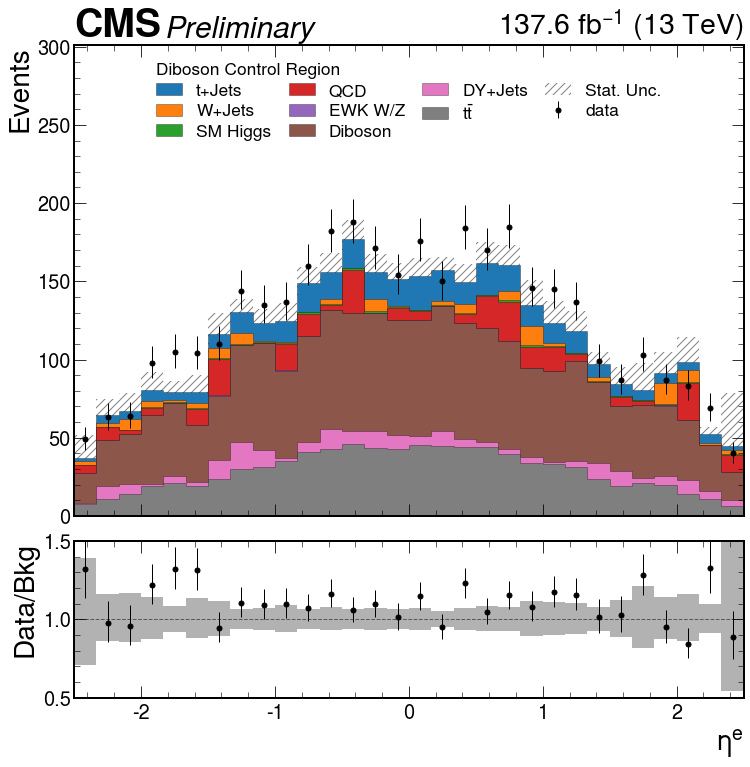

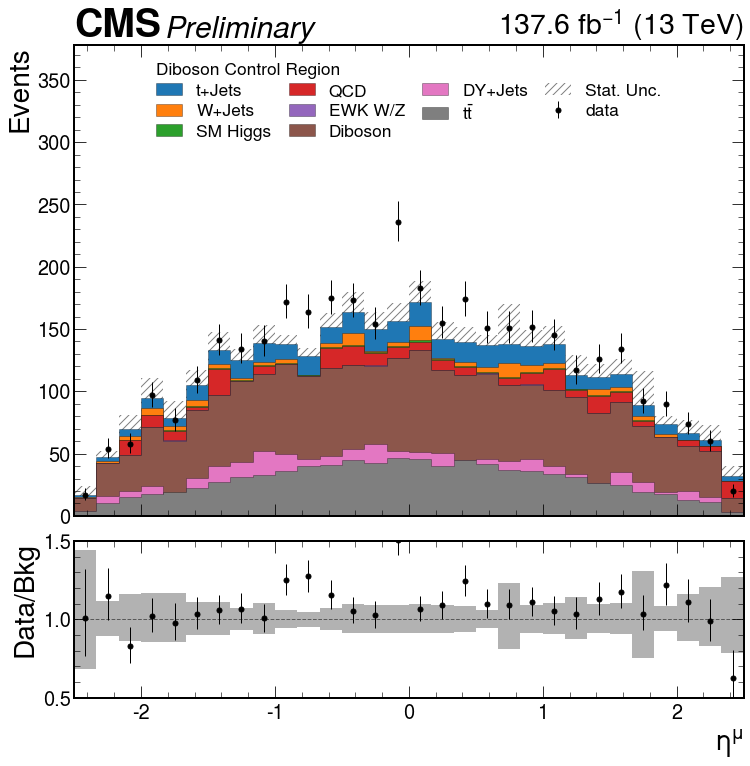

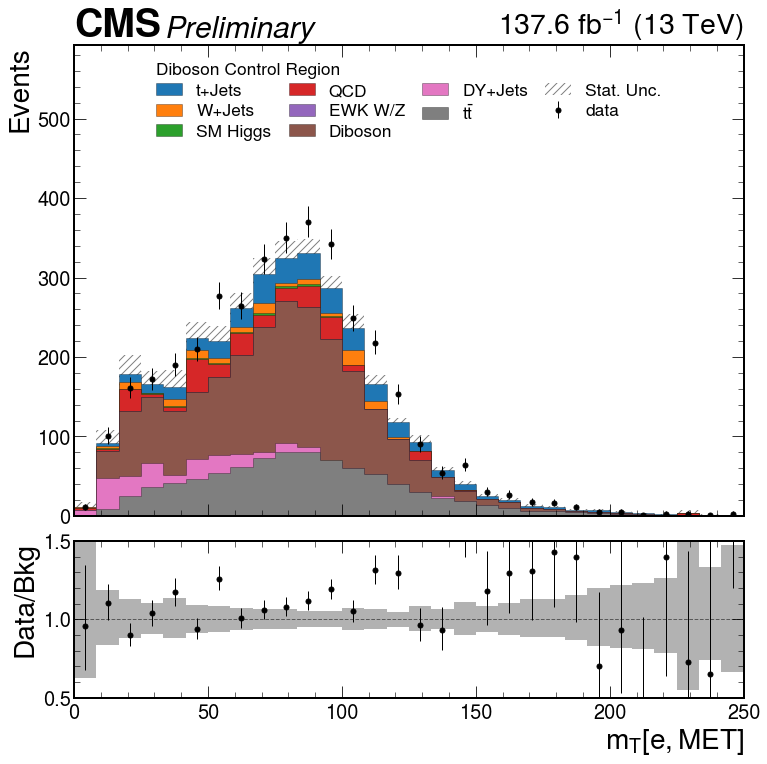

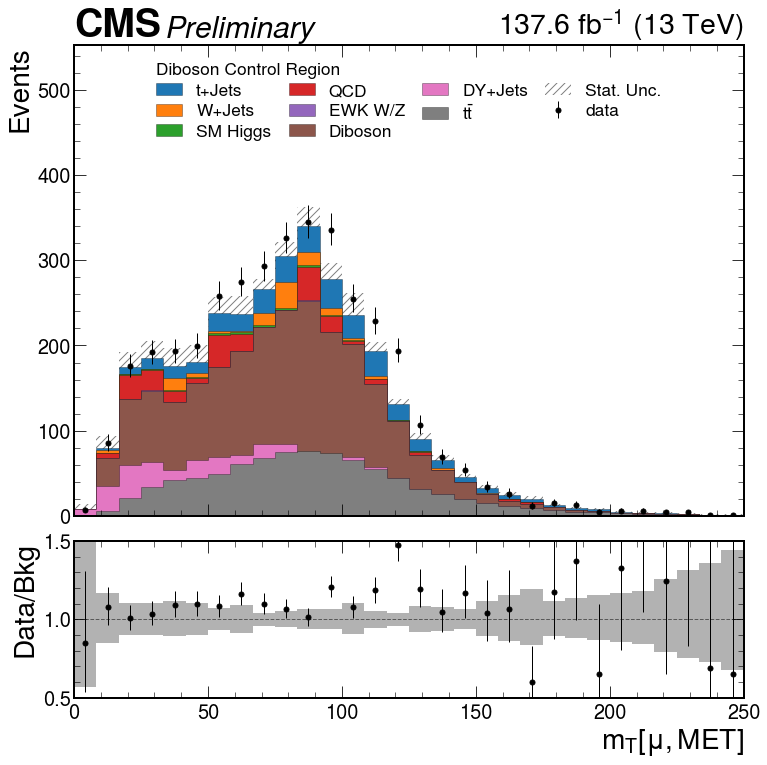

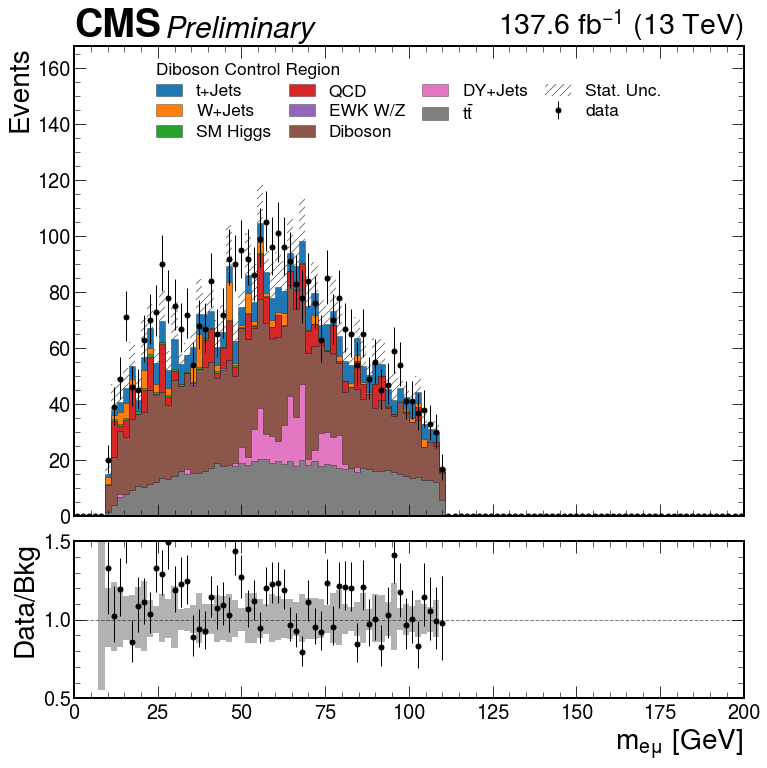

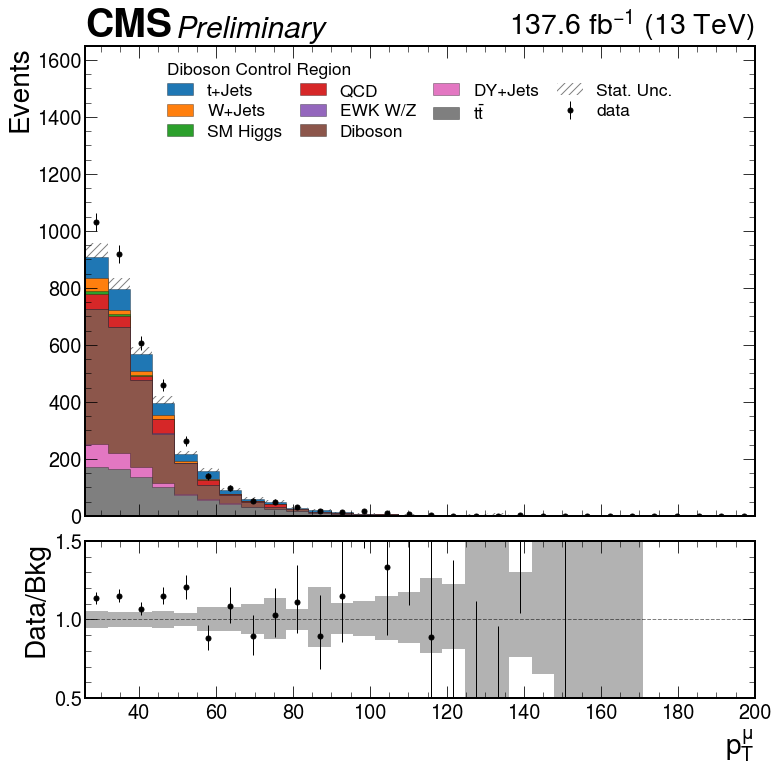

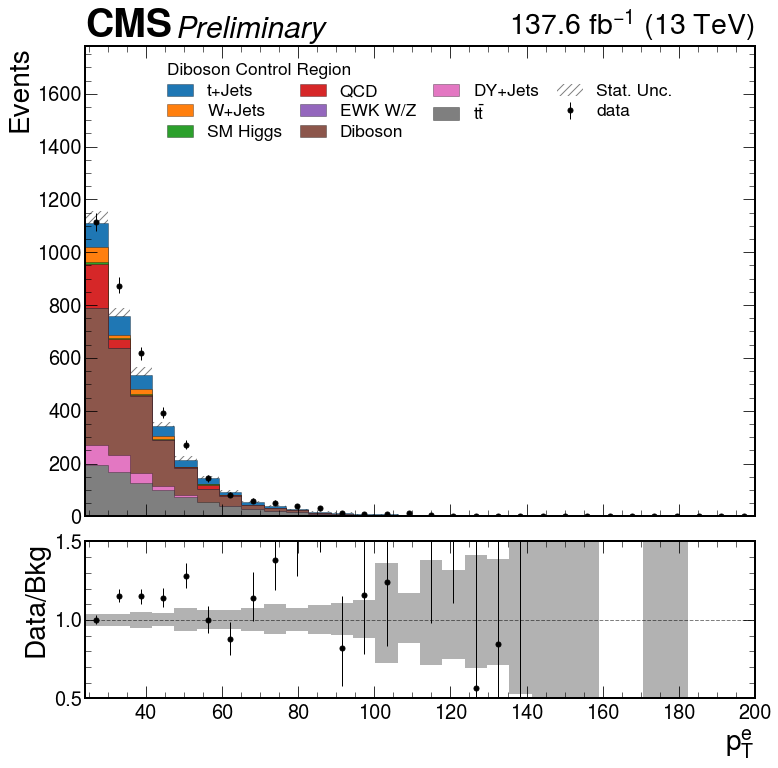

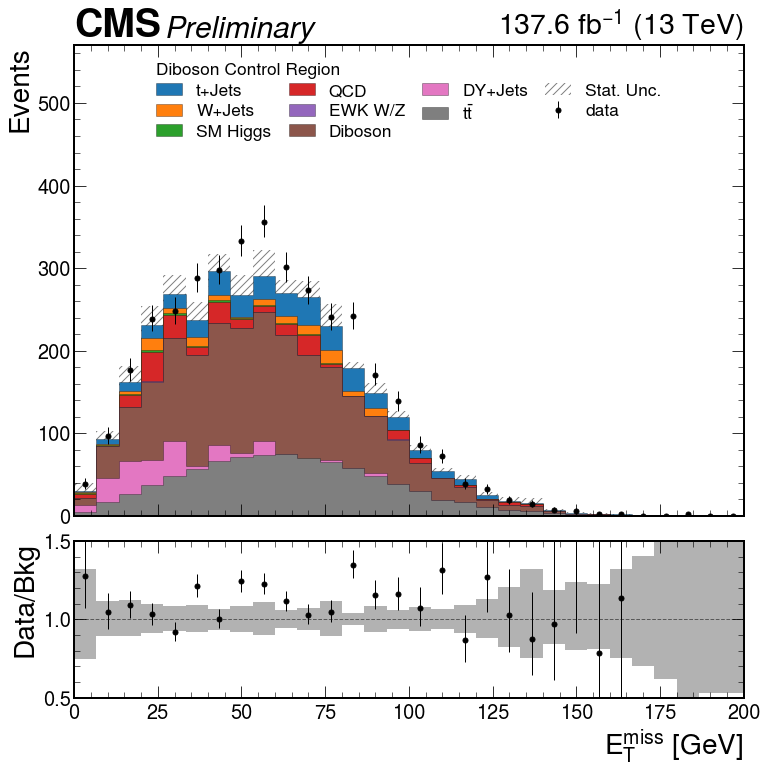

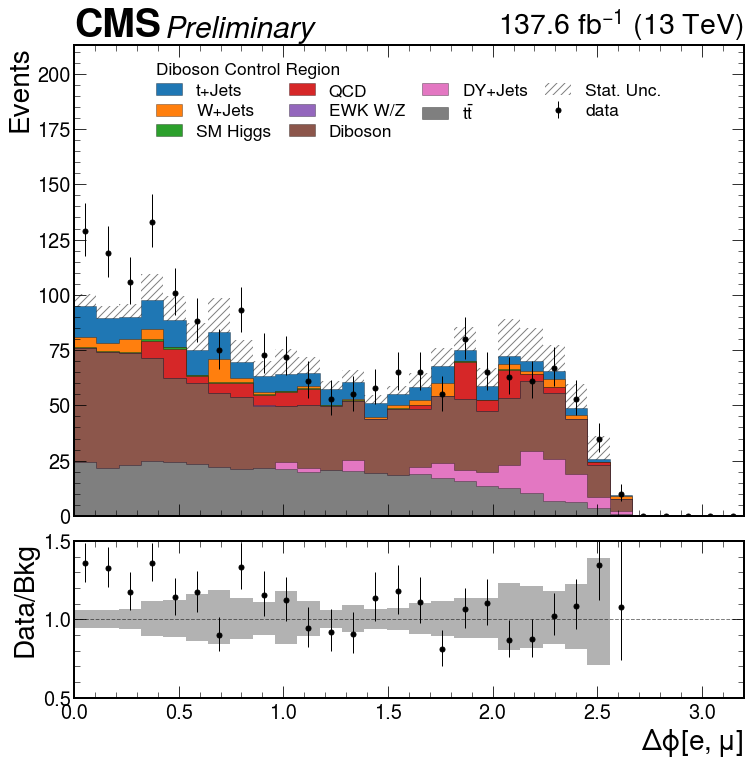

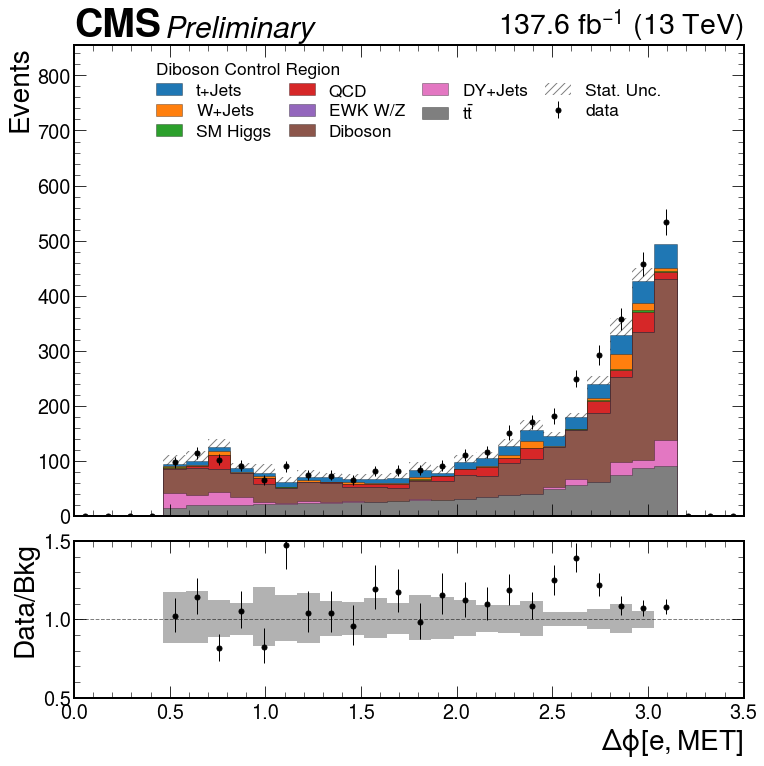

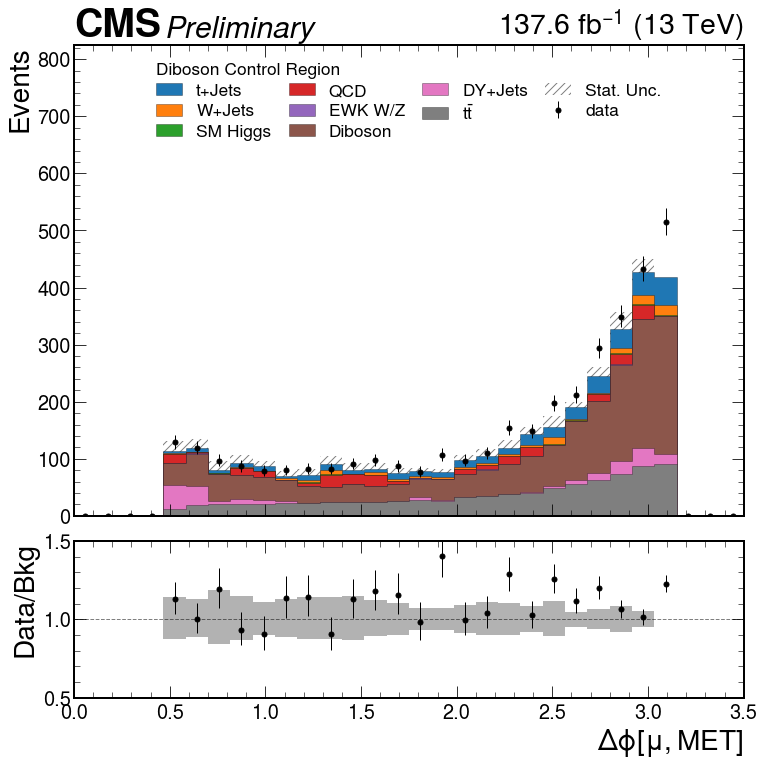

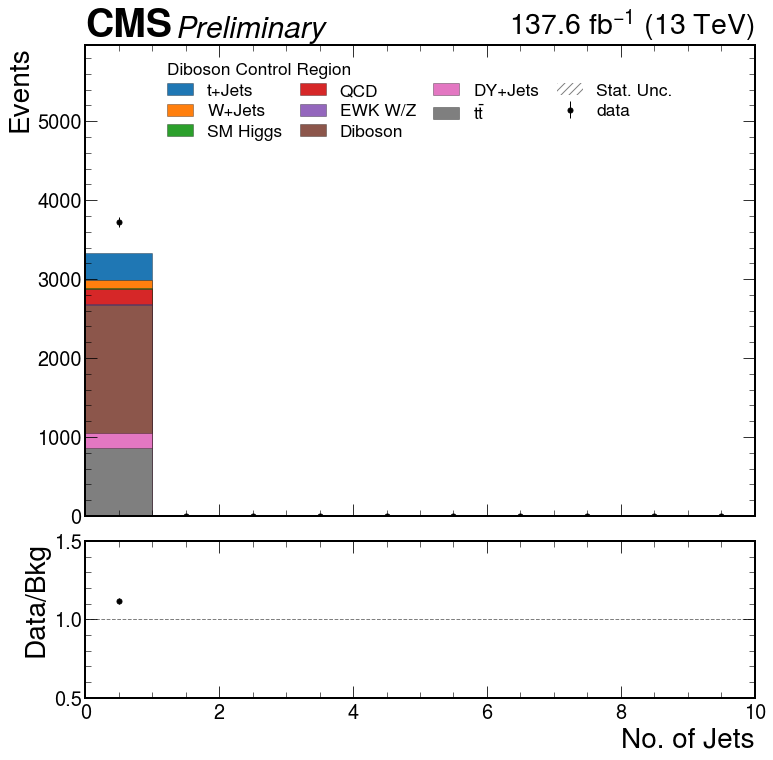

In [201]:
from coffea.util import save, load
from coffea import hist
import math
import mplhep

%matplotlib inline

catlabels = ['GG cat, 0 jets']
catlabels2 = ['gg0']

list_of_bkg = [r'$t\bar{t}$', 't+Jets', 'SM Higgs', "DY+Jets", "EWK W/Z", "Diboson", "W+Jets"]#, "QCD"]

xlabel_dict = {
    "$\eta^{j_{1}}$"
}

label_dict = {
    'data': 'data',
    'TTTo2L2Nu': r'$t\bar{t}$',
    'GluGlu_LFV_HToEMu_M125': r'$H\rightarrow e\mu$ (BR=1%)',
    'DYJetsToLL_M-50': r'DY+Jets',
    "Stat. unc.": "Stat. unc."
}

for var_ in feature_lists:
    histo = dict_of_hists[var_] 

    data = histo["data"] 
    bkg = histo[list_of_bkg]

    qcd = histo['QCD'].copy()
    (k, v), = histo['QCD']._sumw.items()
    qcd._sumw2[k][qcd._sumw[k]<0] = 0
    qcd._sumw[k][qcd._sumw[k]<0] = 0
    bkg.add(qcd)

    import matplotlib.pyplot as plt
    plt.style.use(mplhep.style.CMS)

    plt.rcParams.update({
        'font.size': 30,
        'axes.titlesize': 24,
        'axes.labelsize': 28,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
    })

    plt.rcParams.update({'lines.linewidth': 3})

    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(12,12),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )
    fig.subplots_adjust(hspace=.08)

    fill_opts = {
        'edgecolor': (0,0,0,0.3),
        #'alpha': 0.8
    }
    error_opts = {
        'label': 'Stat. Unc.',
        'hatch': '///',
        'facecolor': 'none',
        'edgecolor': (0,0,0,.5),
        'linewidth': 0
    }
    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }

    hist.plot1d(
        bkg,
        overlay="dataset",
        ax=ax,
        clear=False,
        stack=True,
        line_opts=None,
        fill_opts=fill_opts,
        error_opts=error_opts
    )

    hist.plot1d(
        data,
        overlay="dataset",
        ax=ax,
        clear=False,
        error_opts=data_err_opts
    )

    ax.autoscale(axis='x', tight=True)

    ax.set_ylim(0, max(data.sum("dataset").values()[()])*1.6)
    ax.set_xlabel(None)

    leg = ax.legend(title_fontsize='xx-small', title='Diboson Control Region', fontsize='xx-small', ncol=4, columnspacing=1, labelspacing=0.25, loc=9)
    leg._legend_box.align = "left"

    hist.plotratio(
        num=data.sum("dataset"),
        denom=bkg.sum("dataset"),
        ax=rax,
        error_opts=data_err_opts,
        denom_fill_opts={},
        guide_opts={},
        unc='num'
    )

    rax.set_ylim(0.5, 1.5)
    rax.set_ylabel("Data/Bkg", loc='center')

    lumi = mplhep.cms.label(ax=ax, lumi=137.6, label="Preliminary", data=1)
    #fig.savefig(f'plots/MCData/{var_}_{catlabel2}.png')

In [205]:
print(data.sum("dataset").values()[()])
print(bkg.sum("dataset").values()[()])

[3725.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
[3336.2341115    0.           0.           0.           0.
    0.           0.           0.           0.           0.       ]
